## Valsa Brasileira: Usando Python para provar uma ideia.

A finalidade desse projeto é observar o aumento da concessão do beneficio sociais através do tempo. E algumas características dessa variável.  


Autor: Adilson Sampaio.
Data: agosto - 2022

##### A Origem dos Dados

Para isso utilizamos duas tabelas do repostório do Bases dos Dados:
1. Diretórios Brasileiros que consiste de um conjuntos de Tabelas ligando diversos códigos institucionais e informações de entidades brasileiras, usando os dados com as informações dos municipios brasileiros;
2. A tabela com os Indicadores de programas do Ministério da Cidadania.


<p>No meu local os dados foram baixados no formato csv e lidos para um Data Frame. <p> 


``` 
df_pgtos = pd.read_csv('../bases/transferencias_municipio.csv', usecols=[0,1,2,3,4,5], sep=',').set_index('id_municipio')
df_pgtos
```  

```
 df_municipio = pd.read_csv('../bases/cidades2.csv', usecols=[0,7,17,20,21,22], sep=',')
```  

Porém usabdo  com o comando SQL a seguir um dataFrame pode ser preenchido em memória.


In [35]:
import basedosdados as bd
import pandas as pd

In [2]:
# Os dados de todos os municipios são carregados diretamente do Datalake
df_municipio = bd.read_sql('SELECT id_municipio, nome, nome_microrregiao, nome_mesorregiao, sigla_uf, nome_uf FROM `basedosdados.br_bd_diretorios_brasil.municipio` ',billing_project_id="dev-analise-basedosdados")

Downloading: 100%|██████████| 5570/5570 [00:00<00:00, 7847.61rows/s]


In [3]:
df_municipio

,id_municipio,nome,nome_microrregiao,nome_mesorregiao,sigla_uf,nome_uf
0,1100015,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia
1,1100023,Ariquemes,Ariquemes,Leste Rondoniense,RO,Rondônia
2,1100031,Cabixi,Colorado do Oeste,Leste Rondoniense,RO,Rondônia
3,1100049,Cacoal,Cacoal,Leste Rondoniense,RO,Rondônia
4,1100056,Cerejeiras,Colorado do Oeste,Leste Rondoniense,RO,Rondônia
...,...,...,...,...,...,...
5565,5222005,Vianópolis,Pires do Rio,Sul Goiano,GO,Goiás
5566,5222054,Vicentinópolis,Meia Ponte,Sul Goiano,GO,Goiás
5567,5222203,Vila Boa,Entorno de Brasília,Leste Goiano,GO,Goiás
5568,5222302,Vila Propício,Entorno de Brasília,Leste Goiano,GO,Goiás


In [4]:
# O texto que orientou esse estdo fala do período entre os anos de 2006 a 2010.
# Para carregar o dado em data frame
df_cidadania = bd.read_sql('SELECT * FROM basedosdados.br_mc_indicadores.transferencias_municipio where ano between 2004 and 2010',billing_project_id="dev-analise-basedosdados")


Downloading: 100%|██████████| 467336/467336 [00:48<00:00, 9714.80rows/s] 


##### Tratamento de dados Nulos e Faltosos

In [5]:
# Os dados sobre os municipios estão completos
# A falta do índice de indicação de 56 (0,65% dos 5570 registros) dos municípios feita pelo Banco Central do Brasil (BCB) não nos atrapalha.
print(df_municipio.isna().sum())

id_municipio         0
nome                 0
nome_microrregiao    0
nome_mesorregiao     0
sigla_uf             0
nome_uf              0
dtype: int64


In [6]:
df_municipio.count()

id_municipio         5570
nome                 5570
nome_microrregiao    5570
nome_mesorregiao     5570
sigla_uf             5570
nome_uf              5570
dtype: int64

####  2. O Data Frame Cidadania

In [7]:
print(df_cidadania.isna().sum())

id_municipio                       0
ano                                0
mes                                0
familias_beneficiarias_pbf         0
pessoas_beneficiarias_pbf     467336
valor_pago_pbf                     0
familias_cadastradas_cu       467336
pessoas_cadastradas_cu        467336
dtype: int64


In [8]:
df_cidadania.count()

id_municipio                  467336
ano                           467336
mes                           467336
familias_beneficiarias_pbf    467336
pessoas_beneficiarias_pbf          0
valor_pago_pbf                467336
familias_cadastradas_cu            0
pessoas_cadastradas_cu             0
dtype: int64

In [9]:
# Para esse conjunto não ha dados sobre o Cadstro Único e o número de pessoas que recebem o Bolsa Familia.
df_cidadania = df_cidadania.drop(columns=['pessoas_beneficiarias_pbf', 'pessoas_cadastradas_cu', 'familias_cadastradas_cu'])

In [10]:
df_cidadania.head(5)

,id_municipio,ano,mes,familias_beneficiarias_pbf,valor_pago_pbf
0,1100015,2004,1,1127,89195.0
1,1100015,2004,2,1127,89195.0
2,1100015,2004,3,1127,89195.0
3,1100015,2004,4,1127,88580.0
4,1100015,2004,5,1127,88490.0


##### Unindo as Base de Dados

In [11]:
dados = df_cidadania.merge(df_municipio, on='id_municipio', how='right')

In [12]:
dados.count()

id_municipio                  467341
ano                           467336
mes                           467336
familias_beneficiarias_pbf    467336
valor_pago_pbf                467336
nome                          467341
nome_microrregiao             467341
nome_mesorregiao              467341
sigla_uf                      467341
nome_uf                       467341
dtype: int64

In [13]:
dados

,id_municipio,ano,mes,familias_beneficiarias_pbf,valor_pago_pbf,nome,nome_microrregiao,nome_mesorregiao,sigla_uf,nome_uf
0,1100015,2004,1,1127,89195.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia
1,1100015,2004,2,1127,89195.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia
2,1100015,2004,3,1127,89195.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia
3,1100015,2004,4,1127,88580.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia
4,1100015,2004,5,1127,88490.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia
...,...,...,...,...,...,...,...,...,...,...
467336,5300108,2010,8,76634,6208360.0,Brasília,Brasília,Distrito Federal,DF,Distrito Federal
467337,5300108,2010,9,76247,6212640.0,Brasília,Brasília,Distrito Federal,DF,Distrito Federal
467338,5300108,2010,10,75565,6196878.0,Brasília,Brasília,Distrito Federal,DF,Distrito Federal
467339,5300108,2010,11,70435,5694461.0,Brasília,Brasília,Distrito Federal,DF,Distrito Federal


In [14]:
# Ué?? Porque não fez direto com SQL...  OK! :-)
sSQL = "SELECT A.id_municipio, A.ano, A.mes,  A.familias_beneficiarias_pbf, A.pessoas_beneficiarias_pbf," \
    " A.valor_pago_pbf, B.nome, B.nome_microrregiao, B.nome_mesorregiao, B.sigla_uf," \
    " B.nome_uf, B.nome_regiao" \
    " FROM `basedosdados.br_mc_indicadores.transferencias_municipio` as" \
    " A INNER JOIN `basedosdados.br_bd_diretorios_brasil.municipio` AS B ON A.id_municipio = B.id_municipio" \
    " where A.ano between 2004 and 2010 "


dadosSQL = bd.read_sql(sSQL,billing_project_id="dev-analise-basedosdados")

Downloading: 100%|██████████| 467336/467336 [01:04<00:00, 7221.33rows/s]


In [15]:
dadosSQL

,id_municipio,ano,mes,familias_beneficiarias_pbf,pessoas_beneficiarias_pbf,valor_pago_pbf,nome,nome_microrregiao,nome_mesorregiao,sigla_uf,nome_uf,nome_regiao
0,1100015,2004,1,1127,<NA>,89195.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia,Norte
1,1100015,2004,2,1127,<NA>,89195.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia,Norte
2,1100015,2004,3,1127,<NA>,89195.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia,Norte
3,1100015,2004,4,1127,<NA>,88580.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia,Norte
4,1100015,2004,5,1127,<NA>,88490.0,Alta Floresta D'Oeste,Cacoal,Leste Rondoniense,RO,Rondônia,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...
467331,5300108,2010,8,76634,<NA>,6208360.0,Brasília,Brasília,Distrito Federal,DF,Distrito Federal,Centro-Oeste
467332,5300108,2010,9,76247,<NA>,6212640.0,Brasília,Brasília,Distrito Federal,DF,Distrito Federal,Centro-Oeste
467333,5300108,2010,10,75565,<NA>,6196878.0,Brasília,Brasília,Distrito Federal,DF,Distrito Federal,Centro-Oeste
467334,5300108,2010,11,70435,<NA>,5694461.0,Brasília,Brasília,Distrito Federal,DF,Distrito Federal,Centro-Oeste


## Analisando os Dados de um Estado. 

Usando os dados do Estado do Rio de Janeiro

In [16]:
# dado do estado do RJ via pesquisa do Datalake com SQL
sSQL = "SELECT A.id_municipio, A.ano, A.mes,  A.familias_beneficiarias_pbf, " \
    " A.valor_pago_pbf, B.nome, B.nome_microrregiao, B.nome_mesorregiao, B.sigla_uf," \
    " B.nome_uf, B.nome_regiao" \
    " FROM `basedosdados.br_mc_indicadores.transferencias_municipio` as" \
    " A INNER JOIN `basedosdados.br_bd_diretorios_brasil.municipio` AS B ON A.id_municipio = B.id_municipio" \
    " where A.ano between 2004 and 2010 and B.sigla_UF = 'RJ'"


dadosRJSQL = bd.read_sql(sSQL,billing_project_id="dev-analise-basedosdados")

Downloading: 100%|██████████| 7728/7728 [00:01<00:00, 6891.72rows/s]


In [17]:
dadosRJSQL

,id_municipio,ano,mes,familias_beneficiarias_pbf,valor_pago_pbf,nome,nome_microrregiao,nome_mesorregiao,sigla_uf,nome_uf,nome_regiao
0,3300100,2004,1,498,36805.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro,Sudeste
1,3300100,2004,2,498,36805.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro,Sudeste
2,3300100,2004,3,498,36805.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro,Sudeste
3,3300100,2004,4,498,36625.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro,Sudeste
4,3300100,2004,5,498,36595.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...
7723,3306305,2010,8,10040,911955.0,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Rio de Janeiro,Sudeste
7724,3306305,2010,9,10074,931046.0,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Rio de Janeiro,Sudeste
7725,3306305,2010,10,9920,936159.0,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Rio de Janeiro,Sudeste
7726,3306305,2010,11,9771,909454.0,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Rio de Janeiro,Sudeste


In [18]:
# dado do estado do RJ - arquivos
dadosRJ = dados.query('sigla_uf == "RJ"')

In [19]:
dadosRJ

,id_municipio,ano,mes,familias_beneficiarias_pbf,valor_pago_pbf,nome,nome_microrregiao,nome_mesorregiao,sigla_uf,nome_uf
266529,3300100,2004,1,498,36805.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro
266530,3300100,2004,2,498,36805.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro
266531,3300100,2004,3,498,36805.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro
266532,3300100,2004,4,498,36625.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro
266533,3300100,2004,5,498,36595.0,Angra dos Reis,Baía da Ilha Grande,Sul Fluminense,RJ,Rio de Janeiro
...,...,...,...,...,...,...,...,...,...,...
274252,3306305,2010,8,10040,911955.0,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Rio de Janeiro
274253,3306305,2010,9,10074,931046.0,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Rio de Janeiro
274254,3306305,2010,10,9920,936159.0,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Rio de Janeiro
274255,3306305,2010,11,9771,909454.0,Volta Redonda,Vale do Paraíba Fluminense,Sul Fluminense,RJ,Rio de Janeiro


Famílias Beneficiadas

In [20]:
from matplotlib import pyplot as plt


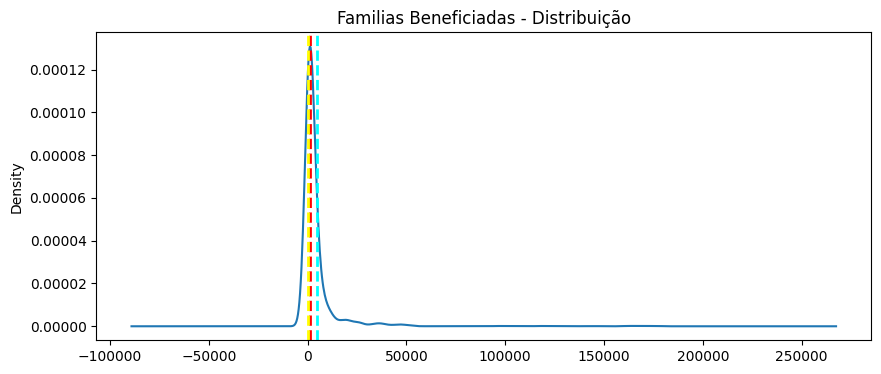

In [21]:
fig = plt.figure(figsize=(10,4))

# Definindo a Variável
dadosRJ['familias_beneficiarias_pbf'].plot.density()

# Rotulo do grafico
plt.title('Familias Beneficiadas - Distribuição')

# A media,a moda e a mediana
plt.axvline(x=dadosRJ['familias_beneficiarias_pbf'].mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=dadosRJ['familias_beneficiarias_pbf'].median(), color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=dadosRJ['familias_beneficiarias_pbf'].mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

# Mostrando...
plt.show()

In [22]:
# Atribuindo a variavel
var = dadosRJSQL['familias_beneficiarias_pbf']

# Criando a Figura
fig = plt.figure(figsize=(10,4))

# Plotando
plt.boxplot(var)

# Colocando o titulo
plt.title('Box-Plot - Estado do RJ - Familia Beneficiadas')

# exibindo
fig.show()

Valores Pagos

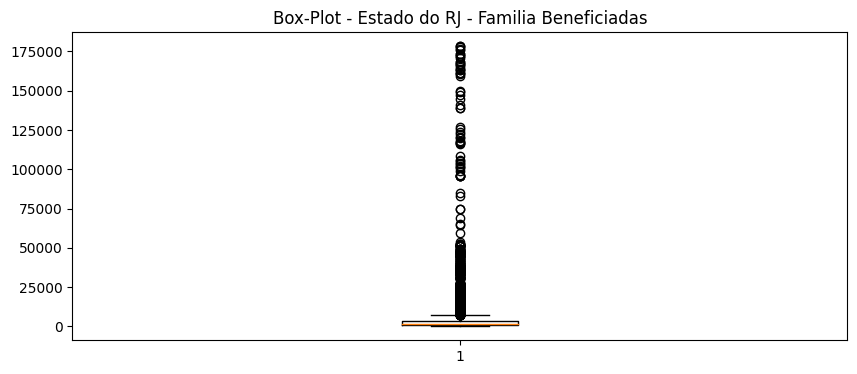

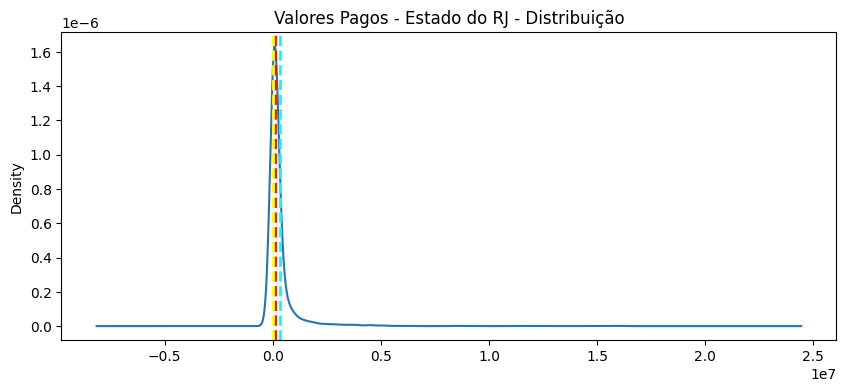

In [23]:
fig = plt.figure(figsize=(10,4))

# Definindo a Variável
dadosRJSQL['valor_pago_pbf'].plot.density()

# Rotulo do grafico
plt.title('Valores Pagos - Estado do RJ - Distribuição')

# A media,a moda e a mediana
plt.axvline(x=dadosRJSQL['valor_pago_pbf'].mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=dadosRJSQL['valor_pago_pbf'].median(), color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=dadosRJSQL['valor_pago_pbf'].mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

# Mostrando...
plt.show()

In [24]:
# Get the variable to examine
var = dadosRJSQL['valor_pago_pbf']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Box-Plot - Estado do RJ - Valores Pagos')

# Show the figure
fig.show()

Estatísticas Básicas das Variavéis para o Estado do RJ

In [25]:
for col_name in ['valor_pago_pbf','familias_beneficiarias_pbf']:
    col = dadosRJSQL[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]
  
    print('\n{}:\n - Range: {:.2f}\n - Variancia: {:.2f}\n - Desvio Padrão: {:.2f}'.format(col_name, rng, var, std))
    print(' - Minimo:{:.2f}\n - Media:{:.2f}\n - Mediana:{:.2f}\n - Moda:{:.2f}\n - Maximo:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))


valor_pago_pbf:
 - Range: 16292658.00
 - Variancia: 1256161063646.47
 - Desvio Padrão: 1120785.91
 - Minimo:0.00
 - Media:352604.83
 - Mediana:85235.00
 - Moda:0.00
 - Maximo:16292658.00


familias_beneficiarias_pbf:
 - Range: 178302.00
 - Variancia: 187569280.38
 - Desvio Padrão: 13695.59
 - Minimo:0.00
 - Media:4625.63
 - Mediana:1224.00
 - Moda:0.00
 - Maximo:178302.00



## Analisando os Dados de uma cidade

Vamos utilizar a cidade de Nova Iguaçu

In [26]:
dadosCity = dadosSQL.query('id_municipio == "3303500"')
# ('sigla_uf == "RJ"')

In [27]:
# Get the variable to examine
var = dadosCity['valor_pago_pbf']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Box-Plot - Cidade - Valores Pagos')

# Show the figure
fig.show()

In [28]:
for col_name in ['valor_pago_pbf','familias_beneficiarias_pbf']:
    col = dadosCity[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]
  
    print('\n{}:\n - Range: {:.2f}\n - Variancia: {:.2f}\n - Desvio Padrão: {:.2f}'.format(col_name, rng, var, std))
    print(' - Minimo:{:.2f}\n - Media:{:.2f}\n - Mediana:{:.2f}\n - Moda:{:.2f}\n - Maximo:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))


valor_pago_pbf:
 - Range: 4619788.00
 - Variancia: 1742259787149.30
 - Desvio Padrão: 1319946.89
 - Minimo:129130.00
 - Media:2334272.93
 - Mediana:1700853.00
 - Moda:129130.00
 - Maximo:4748918.00


familias_beneficiarias_pbf:
 - Range: 47616.00
 - Variancia: 155307420.20
 - Desvio Padrão: 12462.24
 - Minimo:1724.00
 - Media:29986.32
 - Mediana:28999.00
 - Moda:1724.00
 - Maximo:49340.00



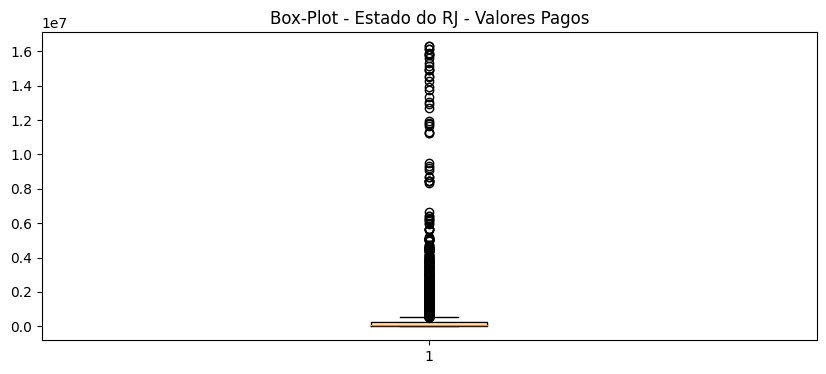

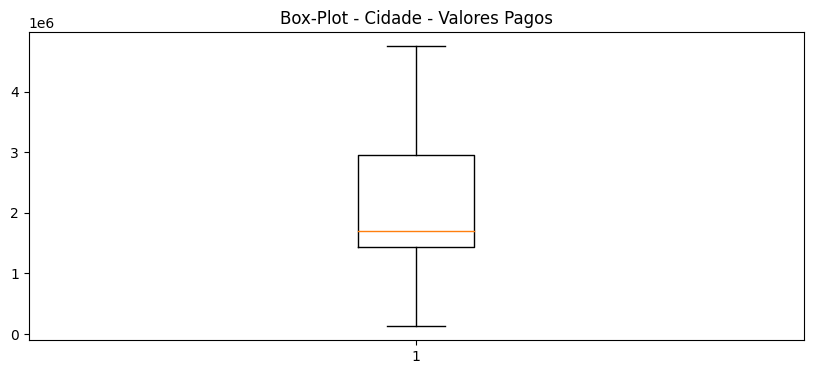

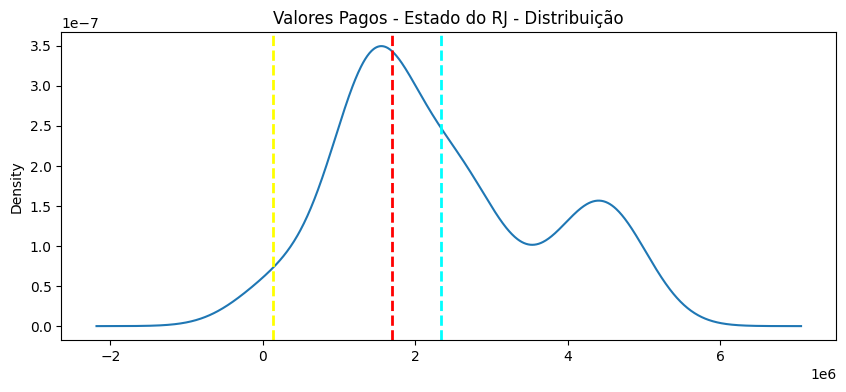

In [29]:
fig = plt.figure(figsize=(10,4))

# Definindo a Variável
dadosCity['valor_pago_pbf'].plot.density()

# Rotulo do grafico
plt.title('Valores Pagos - Estado do RJ - Distribuição')

# A media,a moda e a mediana
plt.axvline(x=dadosCity['valor_pago_pbf'].mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=dadosCity['valor_pago_pbf'].median(), color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=dadosCity['valor_pago_pbf'].mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

# Mostrando...
plt.show()